In [ ]:
!pip install psycopg2
!pip install peewee

# Challenge
Quebit is currently deployed at an intersection in Stellenbosch, where we are collecting traffic data. For this task, we would like you to extract various insights from the data.

# PostgreSQL Data Retrieval
## Overview
This script connects to an AWS RDS PostgreSQL database and retrieves data from a specified table using psycopg2 and pandas libraries in Python.

## Dependencies
pandas (pd): Data manipulation library for creating DataFrames.
psycopg2: PostgreSQL adapter for Python, enabling database connection and query execution.

## Workflow
1. Establish Connection
- Connects to the specified PostgreSQL database using psycopg2.
- Upon successful connection, a message "Connected to the database" is printed.

2. Execute SQL Query
- Uses a cursor object to execute a SQL query on the database.
- The SQL query selects all data from the 'individual_data' table.

3. Fetch Data
- Retrieves the query result (rows) using `cursor.fetchall()`.

4. Close Connection
- Closes the cursor and connection to the database.
- Prints "Connection closed" upon successful closure.

5. Convert to DataFrame
- Converts the fetched rows into a Pandas DataFrame (`df`).
- Optionally, sets column names based on the expected schema.

6. Output or Manipulate Data
- The script can print the first few rows of the DataFrame (`df.head()`).
- Data manipulation or further analysis can be performed on the DataFrame as needed.

## Usage
- Ensure all dependencies are installed (`pandas`, `psycopg2`).
- Update database credentials (`db_endpoint`, `db_port`, `db_name`, `db_user`, `db_password`) with actual values.
- Run the script to connect to the database, execute the query, fetch data, and process it into a DataFrame.

## Notes
- Ensure that the PostgreSQL database is accessible from the network where this script is executed.
- Modify the SQL query (query) as needed to retrieve specific data or apply filters.

In [1]:
import pandas as pd
import psycopg2
from psycopg2 import sql

# AWS RDS PostgreSQL database credentials
db_endpoint = 'quebit-challenge.cz1qnzkzmvn0.us-west-2.rds.amazonaws.com'
db_port = '5432'
db_name = 'postgres'
db_user = 'quebit_challenge_user'
db_password = '&m^!Cwy7Hvy$F&'

# Establish a connection to the database
try:
    conn = psycopg2.connect(
        dbname=db_name,
        user=db_user,
        password=db_password,
        host=db_endpoint,
        port=db_port
    )
    print("Connected to the database")
    
    # Create a cursor object to execute SQL queries
    cursor = conn.cursor()   
    
    # Construct the SQL query with parameters to avoid SQL injection
    query = sql.SQL("SELECT * FROM individual_data;")
    
    # Execute the query with the specified time range
    cursor.execute(query)
    
    # Fetch all rows into a list of tuples
    rows = cursor.fetchall()
    
    # Close the cursor and connection
    cursor.close()
    conn.close()
    print("Connection closed")
    
    # Create a Pandas DataFrame from the fetched rows
    df = pd.DataFrame(rows)
    
    # Optionally, you can set column names based on your table schema
    df.columns = ['id', 'camera_ip', 'site_id', 'site_name', 'classification', 'confidance', 'dataNumber', 'detectorZone', 'entryFrameCounter', 'exitFrameCounter', 'gapTime', 'length', 'massageType', 'sequenceNr', 'speed', 'time', 'dtype']
    
    # Print or manipulate the DataFrame as needed
    df.head()  # Print the first few rows of the DataFrame
    
except Exception as e:
    print("Error:", e)

C:\Users\fortu\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Connected to the database
Connection closed


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75980 entries, 0 to 75979
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 75980 non-null  object
 1   camera_ip          75980 non-null  object
 2   site_id            75980 non-null  object
 3   site_name          75980 non-null  object
 4   classification     75980 non-null  object
 5   confidance         75980 non-null  object
 6   dataNumber         75980 non-null  object
 7   detectorZone       75980 non-null  object
 8   entryFrameCounter  75980 non-null  object
 9   exitFrameCounter   75980 non-null  object
 10  gapTime            75980 non-null  object
 11  length             75980 non-null  object
 12  massageType        75980 non-null  object
 13  sequenceNr         75980 non-null  object
 14  speed              75980 non-null  object
 15  time               75980 non-null  object
 16  dtype              75980 non-null  objec

In [3]:
# Convert timestamp to datetime dtype
df['time'] = pd.to_datetime(df['time'],utc=True)
df['confidance'] = pd.to_numeric(df['confidance'], downcast="integer")
df['gapTime'] = pd.to_numeric(df['gapTime'], downcast="integer")
df['length'] = pd.to_numeric(df['length'], downcast="integer")
df['speed'] = pd.to_numeric(df['speed'], downcast="integer")

# 1. Traffic volume
## 1.1. Query vehicle counts
Use Peewee to write a query to select rows from the individual_data table within a timeframe of 2024-03-08T06:00:00+02:00 to 2024-03-08T17:00:00+02:00. Recall that some turning movements are counted by multiple cameras and detector zones. The table below specifies the detector zones that should be ignored for each of the cameras.

In [4]:
# Assuming you have a DataFrame named df with the specified columns

# Define the conditions
condition_1 = ~((df['camera_ip'] == '172.30.15.52') & df['detectorZone'].isin(['5', '6']))
condition_2 = ~((df['camera_ip'] == '172.30.15.53') & df['detectorZone'].isin(['1', '2', '3', '8']))
condition_3 = ~((df['camera_ip'] == '172.30.15.54') & df['detectorZone'].isin(['3', '4', '5', '6']))
condition_4 = ~((df['camera_ip'] == '172.30.15.55') & df['detectorZone'].isin(['7', '8']))

# Apply the conditions and filter by the timeframe
filtered_df = df[
    (df['time'] >= '2024-03-08T06:00:00+02:00') &
    (df['time'] <= '2024-03-08T17:00:00+02:00') &
    condition_1 & condition_2 & condition_3 & condition_4
]

# Count the rows
row_count = len(filtered_df)
print("Number of rows within the specified timeframe:", row_count)

Number of rows within the specified timeframe: 42828


In [5]:
filtered_df.head()

,id,camera_ip,site_id,site_name,classification,confidance,dataNumber,detectorZone,entryFrameCounter,exitFrameCounter,gapTime,length,massageType,sequenceNr,speed,time,dtype
203,9a846cdd-bd29-44db-92d6-14992572e177,172.30.15.52,51.51.50.48.57.54,Technopark,1,8,323278,3,57290902,57290922,82,55,Data,285124,51,2024-03-08 04:00:00.194000+00:00,IndividualData
204,5f2a187c-de1f-4aad-943d-bf64ad23bd02,172.30.15.52,51.51.50.48.57.54,Technopark,1,9,323279,4,57290920,57290936,1048,55,Data,285125,62,2024-03-08 04:00:00.475000+00:00,IndividualData
206,33748e44-b18b-48eb-839e-b8c7633d4e13,172.30.15.54,51.51.50.48.57.54,Technopark,1,5,105407,1,40265516,40265536,1038,60,Data,78631,55,2024-03-08 04:00:07.894000+00:00,IndividualData
207,224ee787-3340-490d-ac71-48a250dacedc,172.30.15.54,51.51.50.48.57.54,Technopark,1,3,105408,1,40265604,40265624,13,60,Data,78632,54,2024-03-08 04:00:09.652000+00:00,IndividualData
208,b3b1433b-8fb8-426f-970a-2709c5e6663a,172.30.15.54,51.51.50.48.57.54,Technopark,1,2,105409,1,40265644,40265672,4,60,Data,78633,40,2024-03-08 04:00:10.614000+00:00,IndividualData


## 1.2 Map detector zones to turning movements
Use the information provided in the previous section to map the remaining detector zones of each camera to a turning movement (route). Use Python functions, classes or structures of your choice to obtain the resulting turning movements. Do not attempt to add the route information to the remote DB. It should be sufficient to store it locally in memory.

In [6]:
import yaml

# Load the YAML data
yaml_data = """
172.30.15.52:
    "1": "stellenbosch_to_blaauwklippen"
    "2": "stellenbosch_to_somersetwest"
    "3": "stellenbosch_to_somersetwest"
    "4": "stellenbosch_to_somersetwest"
    "5": "stellenbosch_to_technopark"
    "6": "stellenbosch_to_technopark"
    "7": "blaauwklippen_to_somersetwest"
172.30.15.53:
    "1": "blaauwklippen_to_somersetwest"
    "2": "blaauwklippen_to_technopark"
    "3": "blaauwklippen_to_stellenbosch"
    "4": "technopark_to_somersetwest"
    "5": "technopark_to_somersetwest"
    "6": "stellenbosch_to_technopark"
    "7": "stellenbosch_to_technopark"
    "8": "_to_blaauwklippen" # only counts cars driving towards Blaauwklippen
172.30.15.54:
    "1": "technopark_to_stellenbosch"
    "2": "technopark_to_blaauwklippen"
    "3": "technopark_to_somersetwest"
    "4": "technopark_to_somersetwest"
    "5": "stellenbosch_to_technopark"
    "6": "stellenbosch_to_technopark"
    "7": "blaauwklippen_to_stellenbosch"
    "8": "somersetwest_to_blaauwklippen"
172.30.15.55:
    "1": "somersetwest_to_technopark"
    "2": "somersetwest_to_technopark"
    "3": "somersetwest_to_stellenbosch"
    "4": "somersetwest_to_stellenbosch"
    "5": "somersetwest_to_stellenbosch"
    "6": "somersetwest_to_blaauwklippen"
    "7": "somersetwest_to_technopark"
    "8": "somersetwest_to_technopark"
"""

data = yaml.safe_load(yaml_data)

# Define a function to map detector zones to turning movements
def map_detector_zones(camera_ip, detector_zone):
    if camera_ip in data and detector_zone in data[camera_ip]:
        return data[camera_ip][detector_zone]
    else:
        return "Unknown"

# Example usage
camera_ip = "172.30.15.52"
detector_zone = "3"
turning_movement = map_detector_zones(camera_ip, detector_zone)
print(f"Camera IP: {camera_ip}, Detector Zone: {detector_zone}, Turning Movement: {turning_movement}")


Camera IP: 172.30.15.52, Detector Zone: 3, Turning Movement: stellenbosch_to_somersetwest


In [7]:
# Create a new column 'turning_movement' in the DataFrame 'df' using a lambda function applied row-wise.
# The lambda function takes each row's 'camera_ip' and 'detectorZone' values as inputs and calls the function 'map_detector_zones' to determine the turning movement.
# The 'map_detector_zones' function likely maps the detector zone information to specific turning movements or directions.
# The 'axis=1' argument specifies that the lambda function should be applied row-wise.
df['turning_movement'] = df.apply(lambda row: map_detector_zones(row['camera_ip'], row['detectorZone']), axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75980 entries, 0 to 75979
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   id                 75980 non-null  object             
 1   camera_ip          75980 non-null  object             
 2   site_id            75980 non-null  object             
 3   site_name          75980 non-null  object             
 4   classification     75980 non-null  object             
 5   confidance         75980 non-null  int8               
 6   dataNumber         75980 non-null  object             
 7   detectorZone       75980 non-null  object             
 8   entryFrameCounter  75980 non-null  object             
 9   exitFrameCounter   75980 non-null  object             
 10  gapTime            75980 non-null  int32              
 11  length             75980 non-null  int16              
 12  massageType        75980 non-null  object     

# 1.4 Investigate speed information
1.4.1 We are interseted in the speed of vehicles driving from Stellenbosch to Somerset West i.e. stellenbosch_to_somersetwest turning movement. Create a suitable visualization to provide insight into this distribtion. Explain why you have chosen the specific data visualization.

In [9]:
# Apply the conditions and filter by the timeframe
filtered_tm_df = df[(df['turning_movement'] == 'stellenbosch_to_somersetwest')]

In [10]:
filtered_tm_df

,id,camera_ip,site_id,site_name,classification,confidance,dataNumber,detectorZone,entryFrameCounter,exitFrameCounter,gapTime,length,massageType,sequenceNr,speed,time,dtype,turning_movement
14,f8cb2006-99a1-4ba3-a32d-fa8848169eb2,172.30.15.52,51.51.50.48.57.54,Technopark,1,8,323221,3,57269568,57269584,888,55,Data,285083,65,2024-03-08 03:52:53.817000+00:00,IndividualData,stellenbosch_to_somersetwest
55,c3c90593-72e3-4275-9d8c-7fc5c1b3bedd,172.30.15.52,51.51.50.48.57.54,Technopark,1,8,323229,4,57274340,57274388,2803,55,Data,285087,21,2024-03-08 03:54:29.810000+00:00,IndividualData,stellenbosch_to_somersetwest
59,db251f35-c4d6-44ad-bdf6-3ce3a888af65,172.30.15.52,51.51.50.48.57.54,Technopark,1,9,323230,3,57274828,57274858,1048,55,Data,285088,32,2024-03-08 03:54:39.202000+00:00,IndividualData,stellenbosch_to_somersetwest
60,ecc6fc76-df4c-451a-8557-3db141b125f2,172.30.15.52,51.51.50.48.57.54,Technopark,2,8,323231,4,57274864,57274900,95,175,Data,285089,88,2024-03-08 03:54:40.042000+00:00,IndividualData,stellenbosch_to_somersetwest
69,27debc36-0ddd-4ca9-9bcb-9318b2597689,172.30.15.52,51.51.50.48.57.54,Technopark,1,8,323234,3,57275886,57275904,205,55,Data,285090,54,2024-03-08 03:55:00.104000+00:00,IndividualData,stellenbosch_to_somersetwest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75936,f118b097-947c-42a7-b8c7-014624da8e50,172.30.15.52,51.51.50.48.57.54,Technopark,1,6,323206,3,57261842,57261852,312,55,Data,285072,98,2024-03-08 03:50:19.317000+00:00,IndividualData,stellenbosch_to_somersetwest
75949,1330163c-16c7-46c7-8009-f02924e14ba7,172.30.15.52,51.51.50.48.57.54,Technopark,1,9,323207,3,57263766,57263786,382,55,Data,285073,51,2024-03-08 03:50:57.961000+00:00,IndividualData,stellenbosch_to_somersetwest
75954,91569366-bb34-41d0-8db4-ff799a958bfa,172.30.15.52,51.51.50.48.57.54,Technopark,1,10,323210,3,57264804,57264886,206,55,Data,285074,14,2024-03-08 03:51:19.941000+00:00,IndividualData,stellenbosch_to_somersetwest
75956,ba46f17f-f272-489f-853b-0fa16c0f5236,172.30.15.52,51.51.50.48.57.54,Technopark,1,1,323211,3,57264908,57264940,4,60,Data,285075,34,2024-03-08 03:51:21.021000+00:00,IndividualData,stellenbosch_to_somersetwest


1.4.2 What are some basic approaches to outlier detection? Implement some method to detect potential outliers in terms of vehicle speed. (Feel free to make distributional assumptions on vehicle speed for simplicity).

# Percentile Method

- This technique works by setting a particular threshold value, which is decided based on our problem statement.
- While we remove the outliers using capping, then that particular method is known as Winsorization.
- Here, we always maintain symmetry on both sides, meaning if we remove 1% from the right, the left will also drop by 1%.

## Plot the distribution plot of the “speed” feature

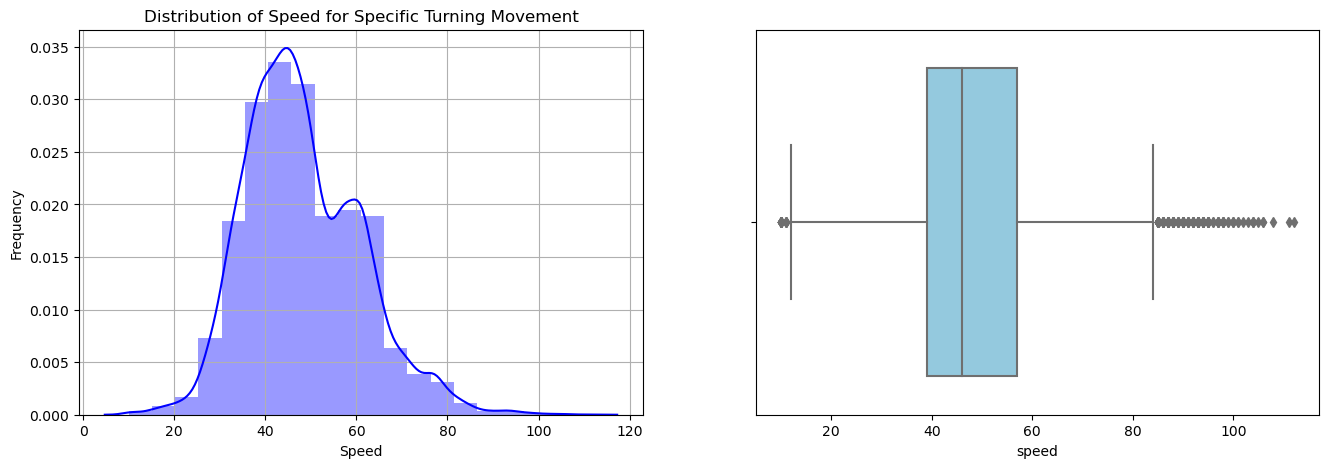

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(filtered_tm_df['speed'], bins=20, color='blue')
plt.xlabel('Speed')
plt.ylabel('Frequency')
plt.title('Distribution of Speed for Specific Turning Movement')
plt.grid(True)
plt.subplot(1,2,2)
sns.boxplot(x='speed', data=filtered_tm_df, color='skyblue')
plt.show()

## Finding the upper and lower limits

In [27]:
upper_limit = filtered_tm_df['speed'].quantile(0.99)
lower_limit = filtered_tm_df['speed'].quantile(0.01)
print(upper_limit)
print(lower_limit)

82.0
23.0


In [35]:
new_df = filtered_tm_df[(filtered_tm_df['speed'] <= 74.78) & (filtered_tm_df['speed'] >= 58.13)]

## Compare the distribution and box-plot after trimming

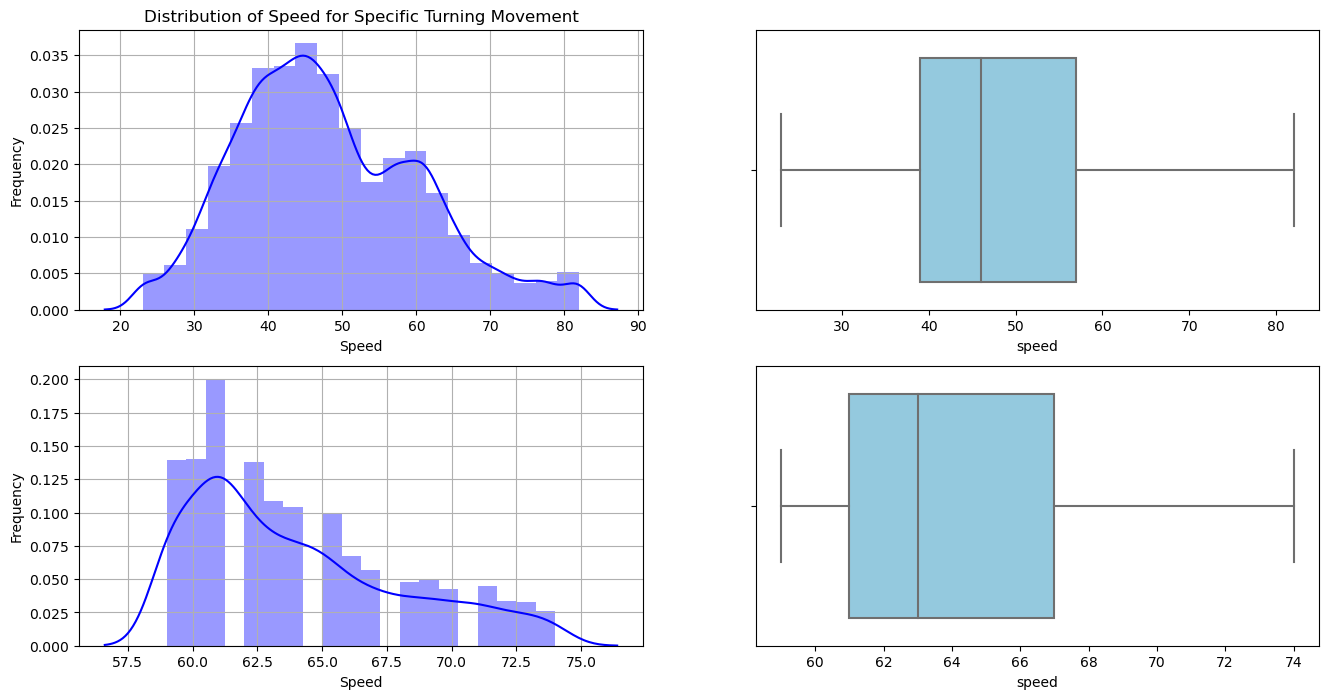

In [36]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.distplot(filtered_tm_df['speed'], bins=20, color='blue')
plt.xlabel('Speed')
plt.ylabel('Frequency')
plt.title('Distribution of Speed for Specific Turning Movement')
plt.grid(True)
plt.subplot(2,2,2)
sns.boxplot(x='speed', data=filtered_tm_df, color='skyblue')
plt.subplot(2,2,3)
sns.distplot(new_df['speed'], bins=20, color='blue')
plt.xlabel('Speed')
plt.ylabel('Frequency')
plt.grid(True)
plt.subplot(2,2,4)
sns.boxplot(x='speed', data=new_df, color='skyblue')
plt.show()

##  Apply Capping (Winsorization)

In [37]:
import numpy as np

filtered_tm_df['speed'] = np.where(filtered_tm_df['speed'] >= upper_limit,
        upper_limit,
        np.where(filtered_tm_df['speed'] <= lower_limit,
        lower_limit,
        filtered_tm_df['speed']))

## Compare the distribution and box-plot after capping

<Axes: xlabel='speed'>

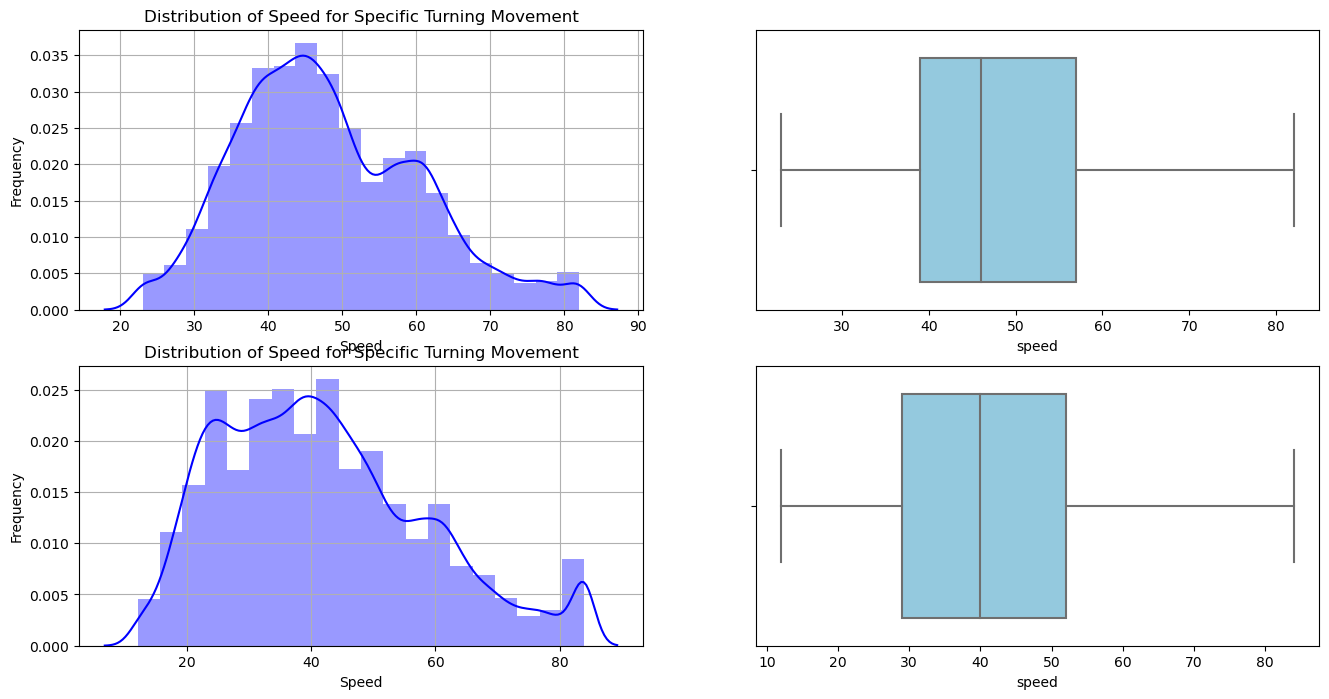

In [32]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.distplot(filtered_tm_df['speed'], bins=20, color='blue')
plt.xlabel('Speed')
plt.ylabel('Frequency')
plt.title('Distribution of Speed for Specific Turning Movement')
plt.grid(True)
plt.subplot(2,2,2)
sns.boxplot(x='speed', data=filtered_tm_df, color='skyblue')
plt.subplot(2,2,3)
sns.distplot(new_df_cap['speed'], bins=20, color='blue')
plt.xlabel('Speed')
plt.ylabel('Frequency')
plt.title('Distribution of Speed for Specific Turning Movement')
plt.grid(True)
plt.subplot(2,2,4)
sns.boxplot(x='speed', data=new_df_cap, color='skyblue')

## 2.1 Query stage information
Query the trap_table Table for information regarding stage changes. Recall that rows where the oid column have a value of 3.6.1.4.1.13267.3.2.5.1.1.3 contain information regarding stage selections. Again select only information within the specified timeframe. Use the timestamp column to select rows that fall within this timeframe. Keep in mind that the format here is Unix time.

In [20]:
# Establish a connection to the database
try:
    conn = psycopg2.connect(
        dbname=db_name,
        user=db_user,
        password=db_password,
        host=db_endpoint,
        port=db_port
    )
    print("Connected to the database")
    
    # Create a cursor object to execute SQL queries
    cursor = conn.cursor()
    
    # Construct the SQL query with parameters to avoid SQL injection
    query = sql.SQL("SELECT * FROM trap_table;")
    
    # Execute the query with the specified time range
    cursor.execute(query)
    
    # Fetch all rows into a list of tuples
    rows = cursor.fetchall()
    
    # Close the cursor and connection
    cursor.close()
    conn.close()
    print("Connection closed")
    

    # Create a Pandas DataFrame from the fetched rows
    df_trap_table = pd.DataFrame(rows)
    
    # Optionally, you can set column names based on your table schema
    df_trap_table.columns = ['id','site_id', 'site_name', 'timestamp', 'stream_site_id', 'oid', 'oid_description', 'value', 'value_type', 'raw']
    
    # Print or manipulate the DataFrame as needed
    df_trap_table.head()  # Print the first few rows of the DataFrame
    
except Exception as e:
    print("Error:", e)

Connected to the database
Connection closed


In [21]:
df_trap_table['timestamp'] = pd.to_datetime(df_trap_table['timestamp'], unit='s')

In [22]:
df_trap_table

,id,site_id,site_name,timestamp,stream_site_id,oid,oid_description,value,value_type,raw
0,abd91c66-7a51-4fef-8854-a77a4cd058b2,51.51.50.48.57.54,Technopark,2024-03-08 06:17:36,51.51.50.48.57.54,3.6.1.4.1.13267.3.2.5.1.1.32,SCOOT Detector Output Presence Bit,00 FF 0F 00 30 30 00 00,Hex-STRING,iso.3.6.1.4.1.13267.3.2.5.1.1.32.22643.6.51.51...
1,fdc3ab91-08fa-4973-8c38-0186973b8c0d,51.51.50.48.57.54,Technopark,2024-03-08 06:17:36,51.51.50.48.57.54,3.6.1.4.1.13267.3.2.5.1.1.32,SCOOT Detector Output Presence Bit,00 FF 0F 00 C0 E0 00 00,Hex-STRING,iso.3.6.1.4.1.13267.3.2.5.1.1.32.22644.6.51.51...
2,6bb008a3-e07f-4559-8761-c9a8d60be588,51.51.50.48.57.54,Technopark,2024-03-08 06:17:36,51.51.50.48.57.54,3.6.1.4.1.13267.3.2.5.1.1.32,SCOOT Detector Output Presence Bit,00 FF 0F 00 00 0F 00 00,Hex-STRING,iso.3.6.1.4.1.13267.3.2.5.1.1.32.22645.6.51.51...
3,ceed001b-a7ef-4d30-a2b0-560f264c8f03,51.51.50.48.57.54,Technopark,2024-03-08 06:17:36,51.51.50.48.57.55,3.6.1.4.1.13267.3.2.5.1.1.3,Stage Confirmation Bits,02,Hex-STRING,iso.3.6.1.4.1.13267.3.2.5.1.1.3.22646.6.51.51....
4,3b942d2c-fcc1-4f61-a6d2-7fb79c0f5144,51.51.50.48.57.54,Technopark,2024-03-08 06:17:36,51.51.50.48.57.54,3.6.1.4.1.13267.3.2.5.1.1.32,SCOOT Detector Output Presence Bit,00 FF 0F 01 00 0C 00 00,Hex-STRING,iso.3.6.1.4.1.13267.3.2.5.1.1.32.22646.6.51.51...
...,...,...,...,...,...,...,...,...,...,...
99094,752cfec5-65e3-4f4a-a8d2-fb4157a31ba8,51.51.50.48.57.54,Technopark,2024-03-08 06:17:36,51.51.50.48.57.55,3.6.1.4.1.13267.3.2.5.1.1.3,Stage Confirmation Bits,00,Hex-STRING,iso.3.6.1.4.1.13267.3.2.5.1.1.3.22638.6.51.51....
99095,c5d773bc-c28f-461c-a8d9-7ed7dec9541c,51.51.50.48.57.54,Technopark,2024-03-08 06:17:36,51.51.50.48.57.54,3.6.1.4.1.13267.3.2.5.1.1.32,SCOOT Detector Output Presence Bit,00 FF 0F 00 00 0F 00 0F,Hex-STRING,iso.3.6.1.4.1.13267.3.2.5.1.1.32.22639.6.51.51...
99096,09e2a14d-7251-450f-85b7-7f73d5c78656,51.51.50.48.57.54,Technopark,2024-03-08 06:17:36,51.51.50.48.57.54,3.6.1.4.1.13267.3.2.5.1.1.32,SCOOT Detector Output Presence Bit,00 FF 0F 00 00 0F 00 00,Hex-STRING,iso.3.6.1.4.1.13267.3.2.5.1.1.32.22640.6.51.51...
99097,071dd93a-a30c-4f79-b78d-d2baf1328ba8,51.51.50.48.57.54,Technopark,2024-03-08 06:17:36,51.51.50.48.57.54,3.6.1.4.1.13267.3.2.5.1.1.32,SCOOT Detector Output Presence Bit,00 FF 0F 00 00 0E 00 00,Hex-STRING,iso.3.6.1.4.1.13267.3.2.5.1.1.32.22641.6.51.51...


In [23]:
condition_1 = ((df_trap_table['oid'] == '3.6.1.4.1.13267.3.2.5.1.1.3'))

# Apply the conditions and filter by the timeframe
filtered_df_trap_table = df_trap_table[
    (df_trap_table['timestamp'] >= '2024-03-08T06') &
    (df_trap_table['timestamp'] <= '2024-03-08T17')&
    condition_1
]

In [24]:
filtered_df_trap_table

,id,site_id,site_name,timestamp,stream_site_id,oid,oid_description,value,value_type,raw
3,ceed001b-a7ef-4d30-a2b0-560f264c8f03,51.51.50.48.57.54,Technopark,2024-03-08 06:17:36,51.51.50.48.57.55,3.6.1.4.1.13267.3.2.5.1.1.3,Stage Confirmation Bits,02,Hex-STRING,iso.3.6.1.4.1.13267.3.2.5.1.1.3.22646.6.51.51....
11,d2e493c7-9043-4706-ba7f-e2643c2f3106,51.51.50.48.57.54,Technopark,2024-03-08 06:17:36,51.51.50.48.57.55,3.6.1.4.1.13267.3.2.5.1.1.3,Stage Confirmation Bits,00,Hex-STRING,iso.3.6.1.4.1.13267.3.2.5.1.1.3.22653.6.51.51....
15,1ed67b8c-fbd7-4d9d-9793-8a96c2e08c50,51.51.50.48.57.54,Technopark,2024-03-08 06:17:36,51.51.50.48.57.55,3.6.1.4.1.13267.3.2.5.1.1.3,Stage Confirmation Bits,01,Hex-STRING,iso.3.6.1.4.1.13267.3.2.5.1.1.3.22656.6.51.51....
23,45d2ba68-ff7c-43ce-ae9d-2865145ea07c,51.51.50.48.57.54,Technopark,2024-03-08 06:17:36,51.51.50.48.57.54,3.6.1.4.1.13267.3.2.5.1.1.3,Stage Confirmation Bits,00,Hex-STRING,iso.3.6.1.4.1.13267.3.2.5.1.1.3.22662.6.51.51....
27,c487e6b6-23e4-4895-b7c3-f28ee29b451d,51.51.50.48.57.54,Technopark,2024-03-08 08:08:32,51.51.50.48.57.54,3.6.1.4.1.13267.3.2.5.1.1.3,Stage Confirmation Bits,10,Hex-STRING,iso.3.6.1.4.1.13267.3.2.5.1.1.3.29335.6.51.51....
...,...,...,...,...,...,...,...,...,...,...
99060,82fef333-9550-4d43-8f06-7e2a7a734139,51.51.50.48.57.54,Technopark,2024-03-08 06:17:36,51.51.50.48.57.55,3.6.1.4.1.13267.3.2.5.1.1.3,Stage Confirmation Bits,02,Hex-STRING,iso.3.6.1.4.1.13267.3.2.5.1.1.3.22608.6.51.51....
99061,f16962ba-aae4-466a-bd01-d4bee4fd8c68,51.51.50.48.57.54,Technopark,2024-03-08 06:17:36,51.51.50.48.57.54,3.6.1.4.1.13267.3.2.5.1.1.3,Stage Confirmation Bits,02,Hex-STRING,iso.3.6.1.4.1.13267.3.2.5.1.1.3.22609.6.51.51....
99069,d1fa0ac3-fa9b-4ae1-a09e-f19602fa215a,51.51.50.48.57.54,Technopark,2024-03-08 06:17:36,51.51.50.48.57.55,3.6.1.4.1.13267.3.2.5.1.1.3,Stage Confirmation Bits,00,Hex-STRING,iso.3.6.1.4.1.13267.3.2.5.1.1.3.22615.6.51.51....
99073,ae480c52-ee63-4a8f-a79f-85a7424e29c4,51.51.50.48.57.54,Technopark,2024-03-08 06:17:36,51.51.50.48.57.55,3.6.1.4.1.13267.3.2.5.1.1.3,Stage Confirmation Bits,01,Hex-STRING,iso.3.6.1.4.1.13267.3.2.5.1.1.3.22618.6.51.51....
